1. Predictive model for most profitable
2. Customer Segmentation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#import data 
df = pd.read_excel('/kaggle/input/arketing-campaign/marketing_campaign.xlsx')

In [3]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [6]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


This dataset cintains no duplicates and very samall portion of null value in income column.

However,we have to further check if the data is balanced or not.

## Data Cleaning

In this step, we are going to impute the missing value, check the uneasonable data, and addressing the outliers if exists.

In [9]:
# check and drop the unreasonable Year_Birth data
count = df[(df['Year_Birth'] < 1920) | (df['Year_Birth'] > 2020)]['ID'].count()
count

3

In [10]:
df = df[~((df['Year_Birth'] < 1920) | (df['Year_Birth'] > 2020))]

In [11]:
#impute the missing values 
df['Income'].fillna(df['Income'].mode(),inplace=True)

/tmp/ipykernel_42/2755878946.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Income'].fillna(df['Income'].mode(),inplace=True)


In [12]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [13]:
num_columns = df.select_dtypes(include = ['number']).columns
num_columns

Index(['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact',
       'Z_Revenue', 'Response'],
      dtype='object')

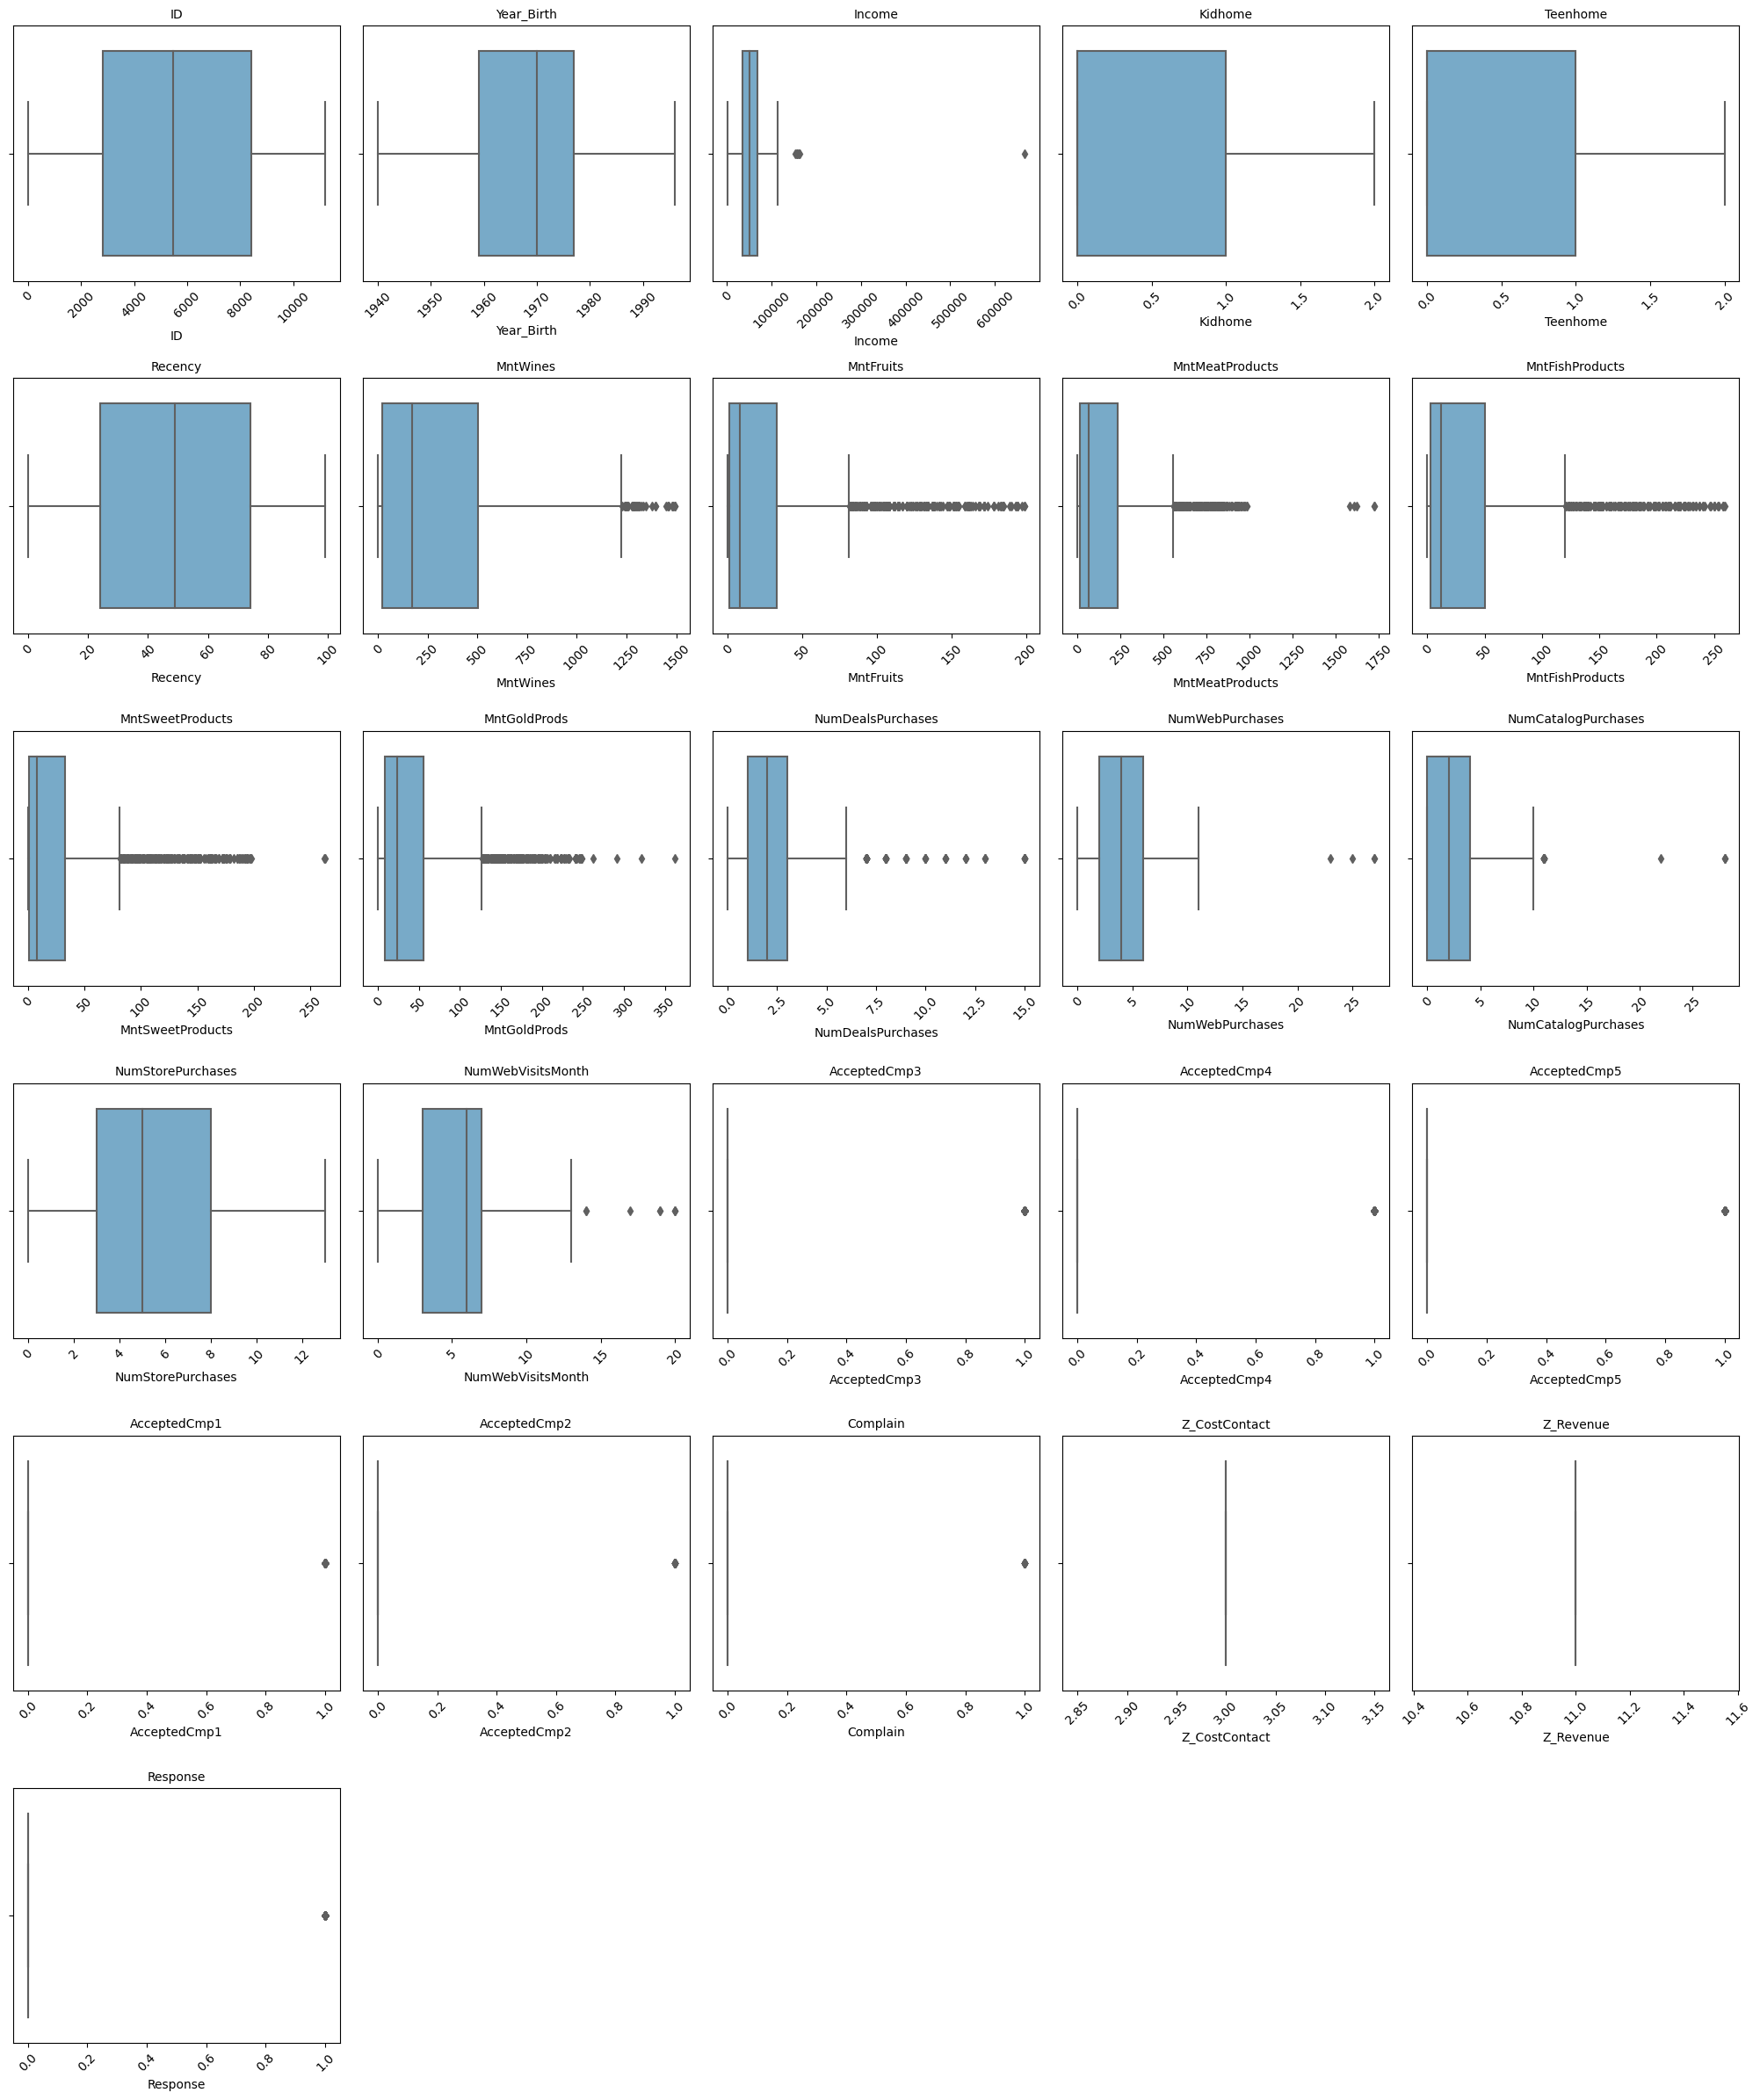

In [14]:
# Check outliers by boxplot
fig, ax = plt.subplots(nrows=6, ncols=5, figsize=(20, 24))  

num_columns = df.select_dtypes(include=['number']).columns

for i in range(6):  
    for j in range(5): 
        index = i*5 + j 
        if index >= len(num_columns):
            ax[i, j].set_visible(False)
        else:
            sns.boxplot(data=df, x=num_columns[index], ax=ax[i, j], palette='Blues')
            ax[i, j].set_title(num_columns[index], fontsize=10) 
            ax[i, j].tick_params(axis='x', labelrotation=45)

fig.tight_layout() 
plt.show()

    

From the above boxplot, we don't need to exclude the data that related to customer's purchase behaviours such items purchased and  pruchase channels. Therefore, we just need to deal with the outiers from Income. And since Z_CostContact and Z_Revenue have only one value, we can't find too many information from them.
So for the next step, we can exclude the outlier from income and drop Z_CostContact and Z_Revenue columns.

In [14]:
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3-Q1 
lower_bound = Q1-1.5*IQR
upper_bound = Q3+1.5*IQR

outliers = df[(df['Income']<(Q1 - 1.5*IQR))|(df['Income']>(Q3+1.5*IQR))]

lower_bound,upper_bound,len(outliers)

(-14615.5, 118348.5, 8)

There are 8 outliers in total, so we can exclude them directly.

In [15]:
# Exclude the outliers of Income
df = df[~(df['Income']<(Q1 - 1.5*IQR))|(df['Income']>(Q3+1.5*IQR))]

In [16]:
# Drop irrevelent columns
df = df.drop(['Z_CostContact', 'Z_Revenue','ID'], axis=1)

In [17]:
# Change Dtcustomer to datatime type
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

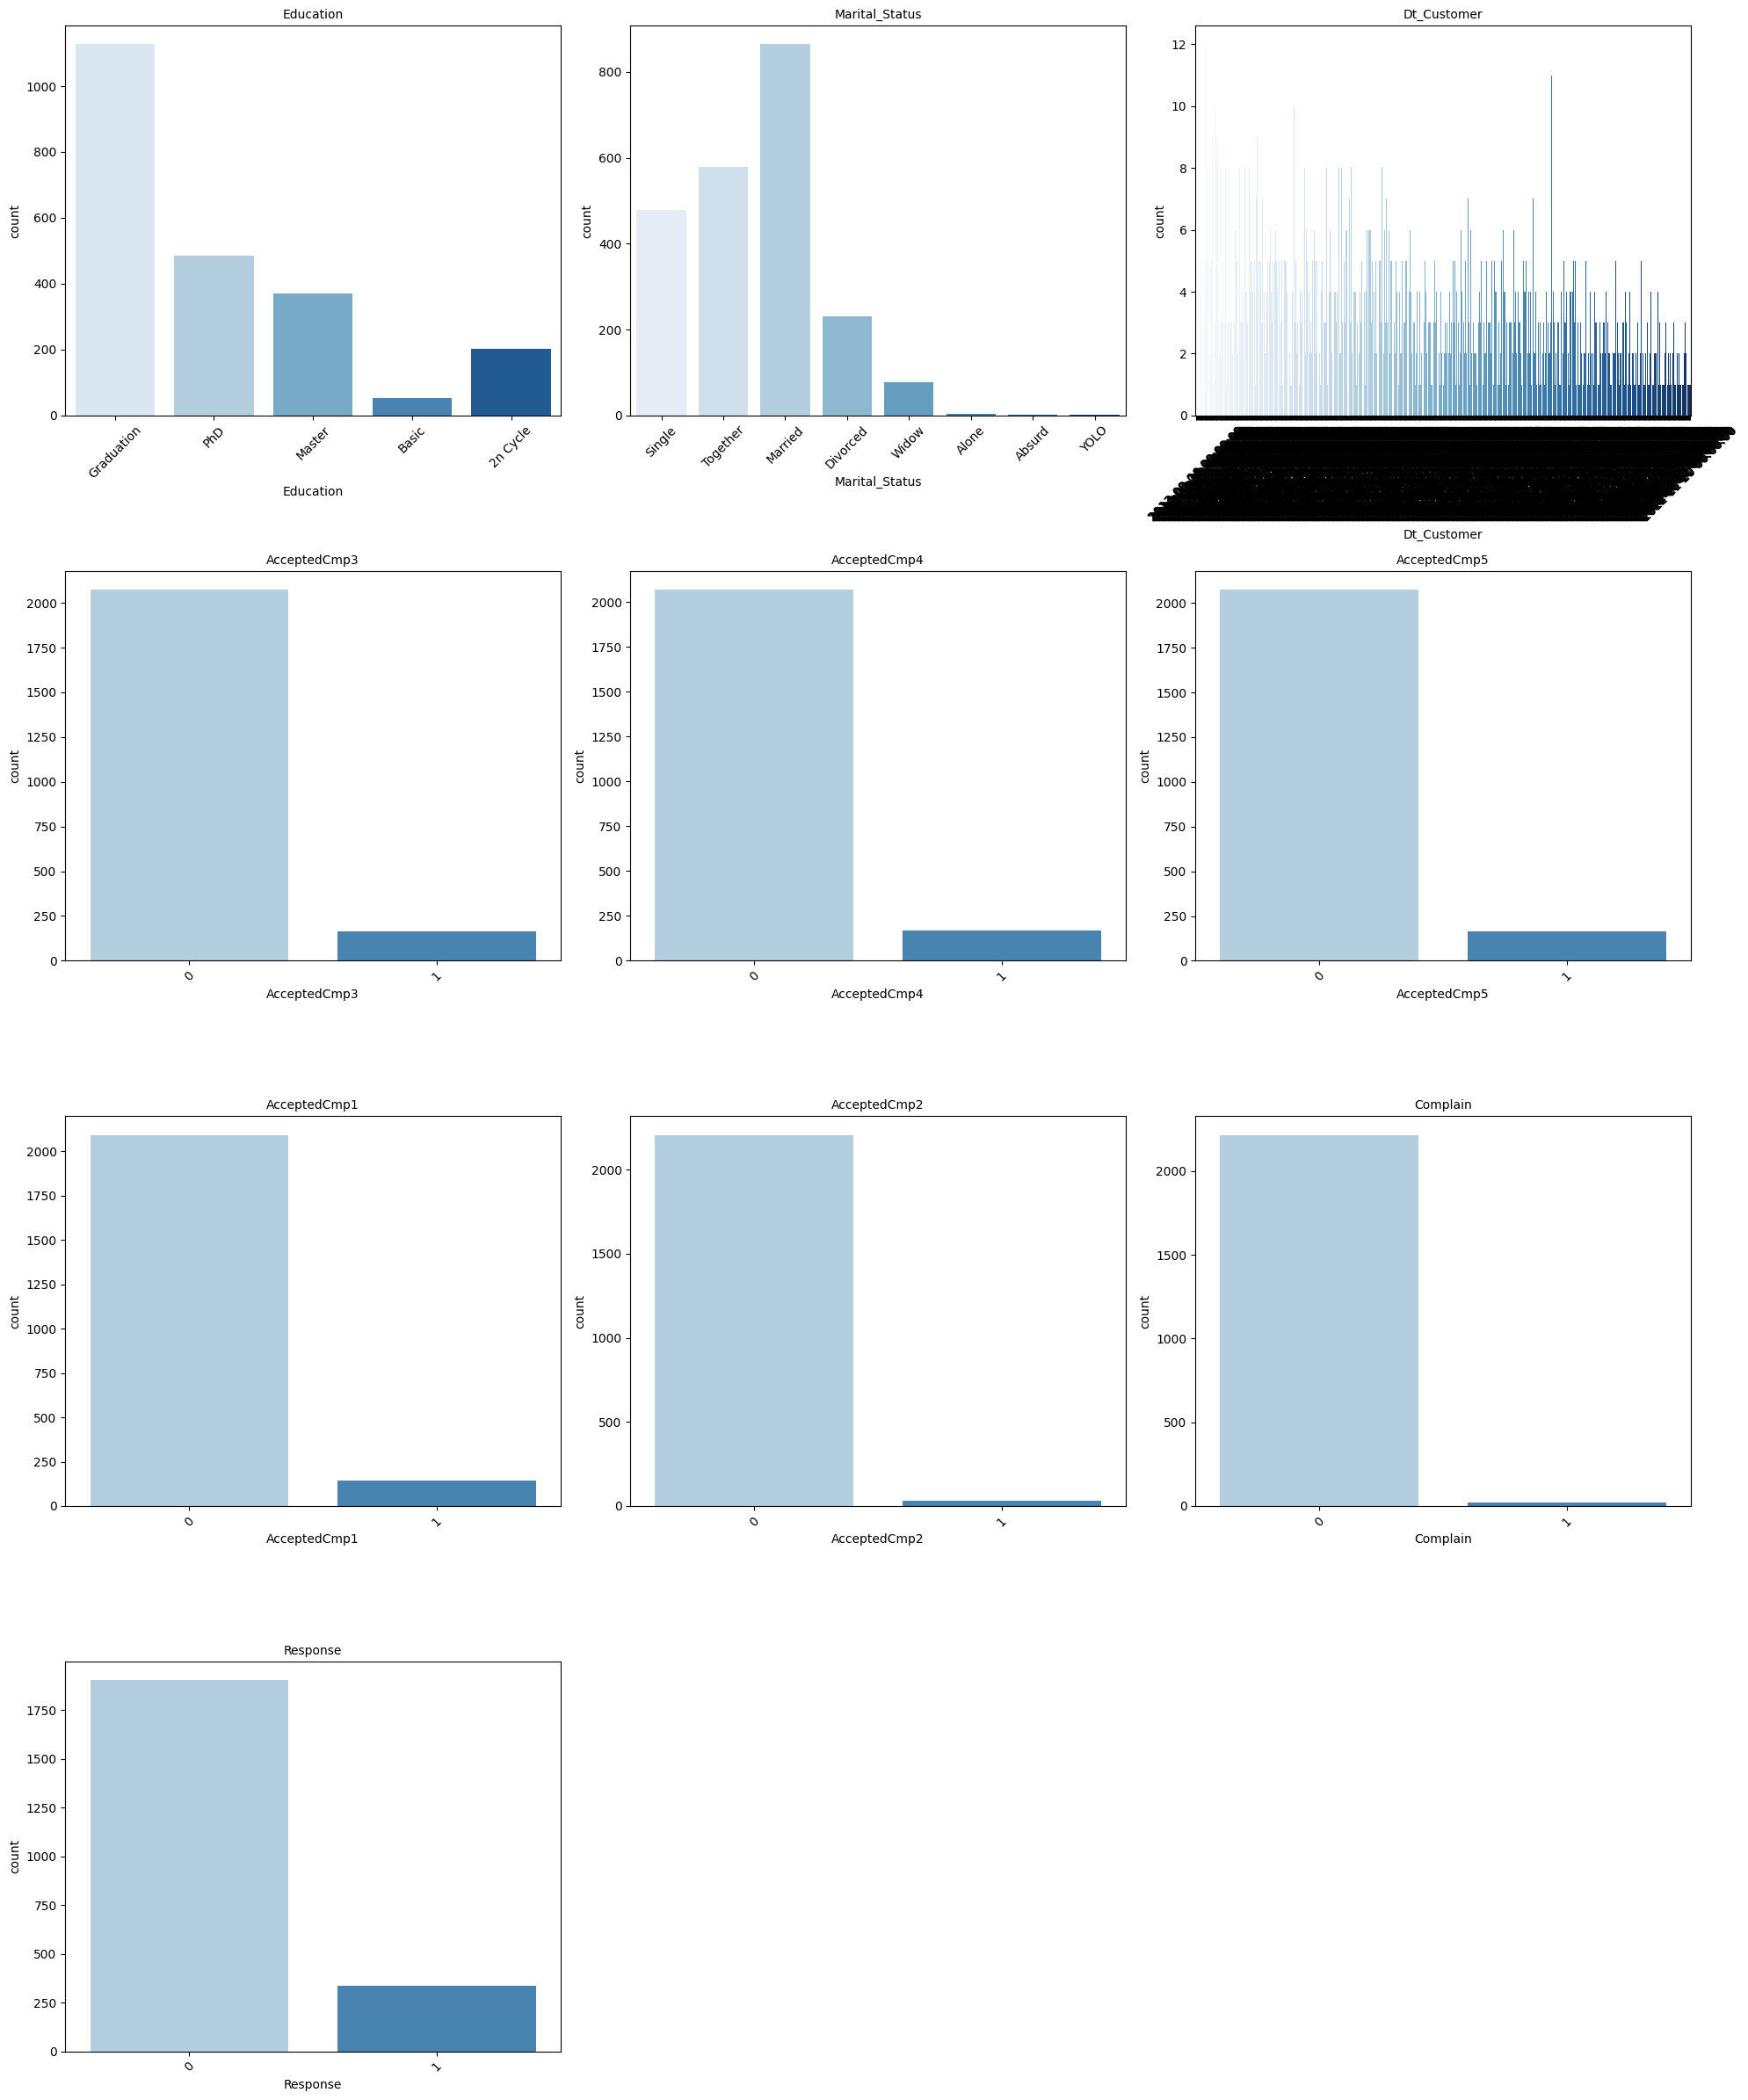

In [19]:
#Distribution plot

fig, ax = plt.subplots(nrows=4, ncols=3, figsize=(20, 24))

cat_columns=['Education', 'Marital_Status', 'Dt_Customer','AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5','AcceptedCmp1', 'AcceptedCmp2', 'Complain','Response']

for i in range(4):  
    for j in range(3): 
        index = i * 3 + j 
        if index >= len(cat_columns):
            ax[i, j].set_visible(False) 
        else:
            sns.countplot(data=df, x=cat_columns[index], ax=ax[i, j], palette='Blues')
            ax[i, j].set_title(cat_columns[index], fontsize=10) 
            ax[i, j].tick_params(axis='x', labelrotation=45)

fig.tight_layout() 
plt.show()


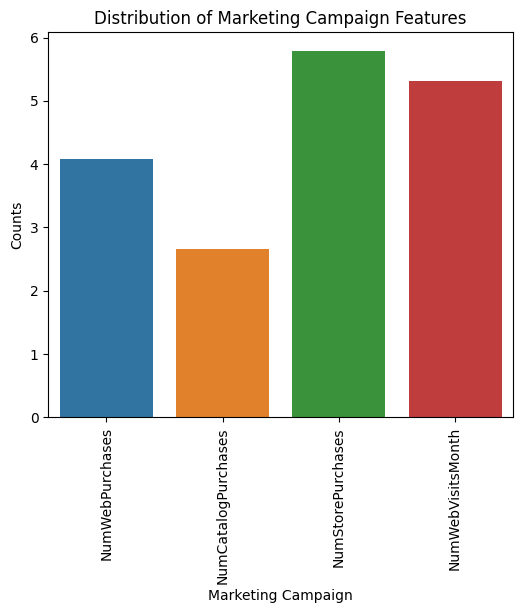

In [21]:
campagin_df = pd.melt(df, value_vars=['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth'])

# Plotting using seaborn
plt.figure(figsize=(6, 5))
sns.barplot(data=campagin_df, x='variable', y='value', errorbar=None)

# Improve the aesthetics and layout
plt.xticks(rotation=90)
plt.xlabel('Marketing Campaign')
plt.ylabel('Counts')
plt.title('Distribution of Marketing Campaign Features')
plt.show()
                        

From the above graph, lable 1 in acceptedCmp and Response are imbalanced, we should banlance them later.

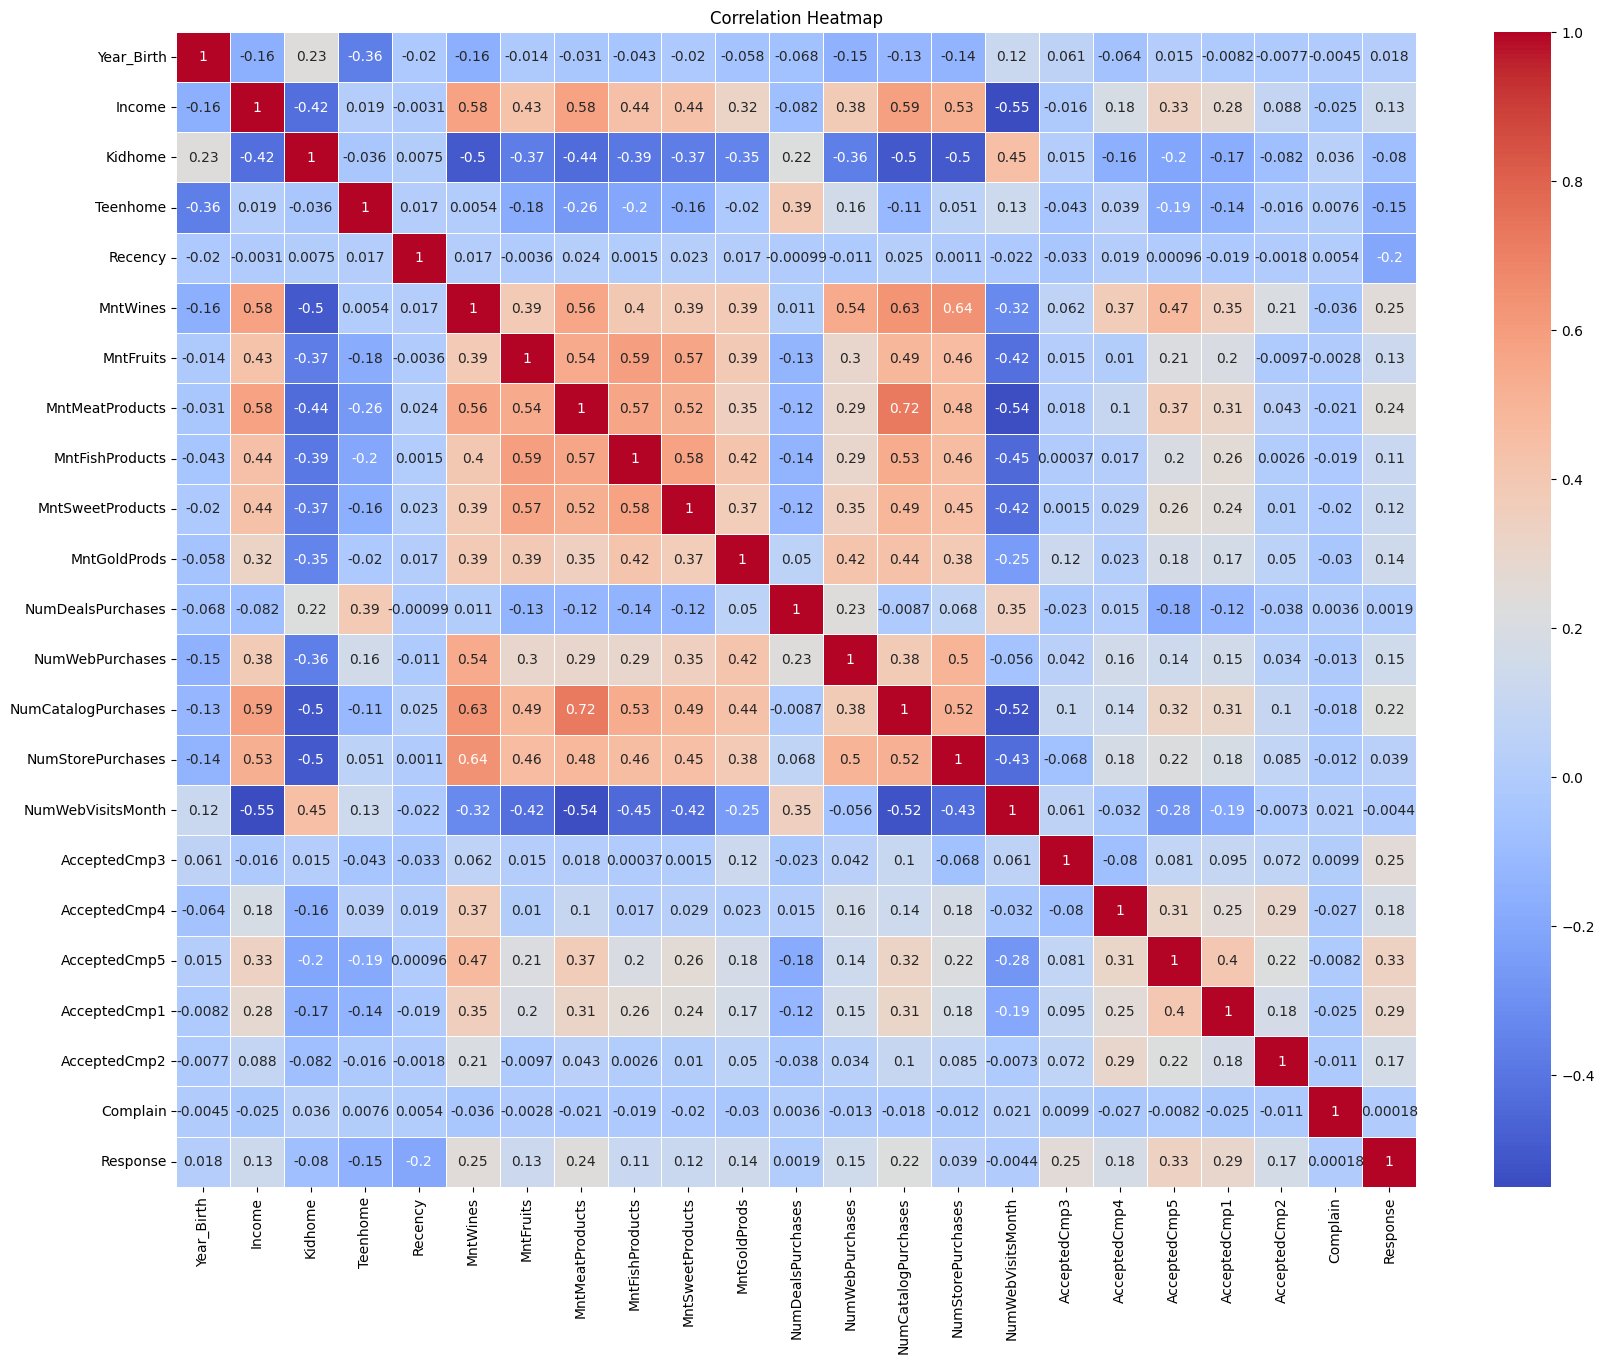

In [20]:
#correlation plot for numerical columns
num_columns = df.select_dtypes(include=['number']).columns
numeric_df = df[num_columns]

# Correlation Heatmap
corr_matrix = numeric_df.corr()

plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

There are few features correlated that we should think about the multicollinearity, but overall not strong correlation between features.

In [140]:
# Convert the date of birth to more relevant age feature
from datetime import datetime

current_year = 2019

df['Age'] = current_year - df['Year_Birth']
df.drop(columns = 'Year_Birth',inplace = True)

In [141]:
# Check the maritus status

df['Marital_Status'].value_counts()

Marital_Status
Married     864
Together    579
Single      479
Divorced    231
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [142]:
# Convert the maritus status
df.loc[(df['Marital_Status'] == 'Absurd') | (df['Marital_Status'] == 'YOLO')|(df['Marital_Status'] == 'Alone'),'Marital_Status'] = 'Single'

In [143]:
df.loc[(df['Education'] == '2n Cycle'), 'Education'] = 'Master'

In [144]:
df['Education'].value_counts()

Education
Graduation    1127
Master         571
PhD            485
Basic           54
Name: count, dtype: int64

In [145]:
#Encoded columns
education_order = {
    'Basic': 0,
    'Graduation': 1,
    'Master': 2,
    'PhD': 3
}
df['Education'] = df['Education'].map(education_order)

In [146]:
df = pd.get_dummies(df, columns=['Marital_Status'])

In [147]:
# Convert Teenhome and Kidhome to reduce the dimensionality 

df['Childrenhome'] = df['Teenhome'] + df['Kidhome']

In [148]:
df['Childrenhome'].value_counts()

Childrenhome
1    1126
0     637
2     421
3      53
Name: count, dtype: int64

In [149]:
df.drop(columns = ['Teenhome','Kidhome','Dt_Customer'], inplace = True)

In [150]:
df.columns

Index(['Education', 'Income', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Age',
       'Marital_Status_Divorced', 'Marital_Status_Married',
       'Marital_Status_Single', 'Marital_Status_Together',
       'Marital_Status_Widow', 'Childrenhome'],
      dtype='object')

Try ramdomforest model and check the feature importance to see if we need further feature Engineering

In [151]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score


# Split the dataset
X = df.drop('Response', axis=1)
y = df['Response']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rfm = RandomForestClassifier().fit(X_train,y_train)
y_pred = rfm.predict(X_test)
accurarcy = accuracy_score(y_test,y_pred)
accurarcy

0.8660714285714286

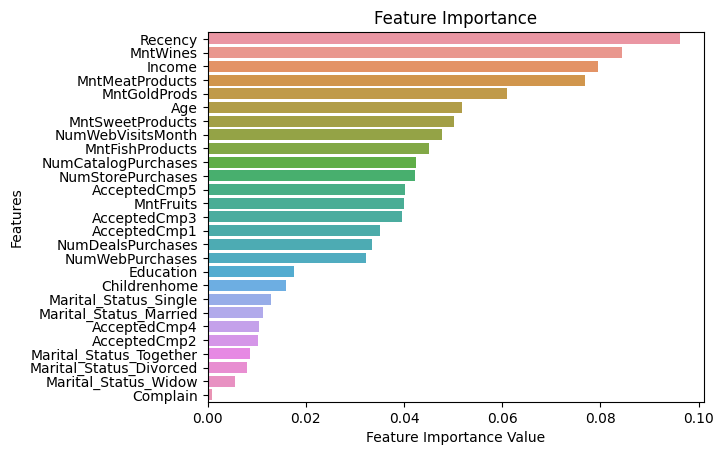

In [152]:
feature_importance = pd.Series(rfm.feature_importances_,index=X_train.columns).sort_values(ascending=False)
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.xlabel('Feature Importance Value')
plt.ylabel('Features')
plt.title("Feature Importance")
plt.show()

Based on the above feature importance, Recency, MntWines, MntMeatProducts, Income, MntGoldProds, Age, MntSweetProducts, and NumWebVisitsMonth are important features, so we will keep them.

The Marital_Status encoded features seems not that importance, so we porbably recoded and combine them with Childrenhome as a new feature.

The AcceptedCmp_ feature seems not that importance, so we porbably combine them as ToalAcceptedCmp.

The Complain seems not important so we peobably drop it.

In [153]:
# Feature engineering

df.drop(columns = 'Complain', inplace = True)

In [154]:
df['TotalAcceptedCmp'] = df['AcceptedCmp1']+df['AcceptedCmp2']+df['AcceptedCmp3']+df['AcceptedCmp4']+df['AcceptedCmp5']

df.drop(columns =['AcceptedCmp1', 'AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5'], inplace = True)

In [155]:
df['Familystatus'] = df['Childrenhome']+df['Marital_Status_Married']+df['Marital_Status_Single']+df['Marital_Status_Together']+df['Marital_Status_Divorced']+df['Marital_Status_Widow']

df.drop(columns = ['Childrenhome','Marital_Status_Married','Marital_Status_Single','Marital_Status_Together','Marital_Status_Divorced','Marital_Status_Widow'], inplace = True)

In [156]:
df.columns

Index(['Education', 'Income', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Response', 'Age', 'TotalAcceptedCmp', 'Familystatus'],
      dtype='object')

## Model Building

In [158]:
import imblearn
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

X = df.drop('Response', axis=1)
y = df['Response']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

columns_to_scale = [col for col in X.columns if col not in ['TotalAcceptedCmp']]

# Initialize the scaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train[columns_to_scale])
X_test_scaled = scaler.transform(X_test[columns_to_scale])
X_train_scaled = pd.DataFrame(X_train_scaled, columns=columns_to_scale, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=columns_to_scale, index=X_test.index)

# Add the unscaled binary feature back to the scaled DataFrame
X_train = pd.concat([X_train_scaled, X_train['TotalAcceptedCmp']], axis=1)
X_test= pd.concat([X_test_scaled, X_test['TotalAcceptedCmp']], axis=1)

In [159]:
# Apply SMOTE to the scaled training data
sm = SMOTE(sampling_strategy='auto', k_neighbors=8,random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)

In [160]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

methods = [LogisticRegression, GaussianNB, RandomForestClassifier, xgb.XGBClassifier]

results_list = []
models = []

for method in methods:
    # Modeling
    model = method().fit(X_train, y_train)
    models.append(model)
    model_name = model.__class__.__name__
    y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred) * 100
    precision = precision_score(y_test, y_pred) * 100
    recall = recall_score(y_test, y_pred) * 100
    f1 = f1_score(y_test, y_pred) * 100 

    results_list.append([model_name, accuracy, precision, recall, f1])

results = pd.DataFrame(results_list, columns=["Models", "Accuracy", "Precision", "Recall", "f1_score"])


results


,Models,Accuracy,Precision,Recall,f1_score
0,LogisticRegression,77.008929,38.345865,70.833333,49.756098
1,GaussianNB,68.750000,28.205128,61.111111,38.596491
2,RandomForestClassifier,86.160714,56.250000,62.500000,59.210526
3,XGBClassifier,86.607143,58.823529,55.555556,57.142857


## Model Tuning

In [161]:
# Tuning for logistic regression

# Define the model
model = LogisticRegression(max_iter=1000)

# Define the parameters grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'] 
}

# Grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='f1', verbose=1)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best F1 score:", grid_search.best_score_)

# Evaluate on the test set with the best found parameters
best_model = grid_search.best_estimator_
test_score = best_model.score(X_test, y_test)
print("Test accuracy with best parameters:", test_score)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
Best F1 score: 0.7932841969957529
Test accuracy with best parameters: 0.7410714285714286


In [162]:
# Check the prediction class percentage:

y_pred = grid_search.predict(X_test)

n_1_sample_resampled = pd.Series(y_pred).value_counts()[1]
n_0_sample_resampled = pd.Series(y_pred).value_counts()[0]
n_sample_resampled = len(y_pred)

# Calculate the percentages
percentage_1_resampled = n_1_sample_resampled / n_sample_resampled
percentage_0_resampled = n_0_sample_resampled / n_sample_resampled

print("Percentage of Class 1:", percentage_1_resampled)
print("Percentage of Class 0:", percentage_0_resampled)

Percentage of Class 1: 0.33482142857142855
Percentage of Class 0: 0.6651785714285714


Best average cross-validation F1 score: 0.9342939276717278
Best n_estimators: 180


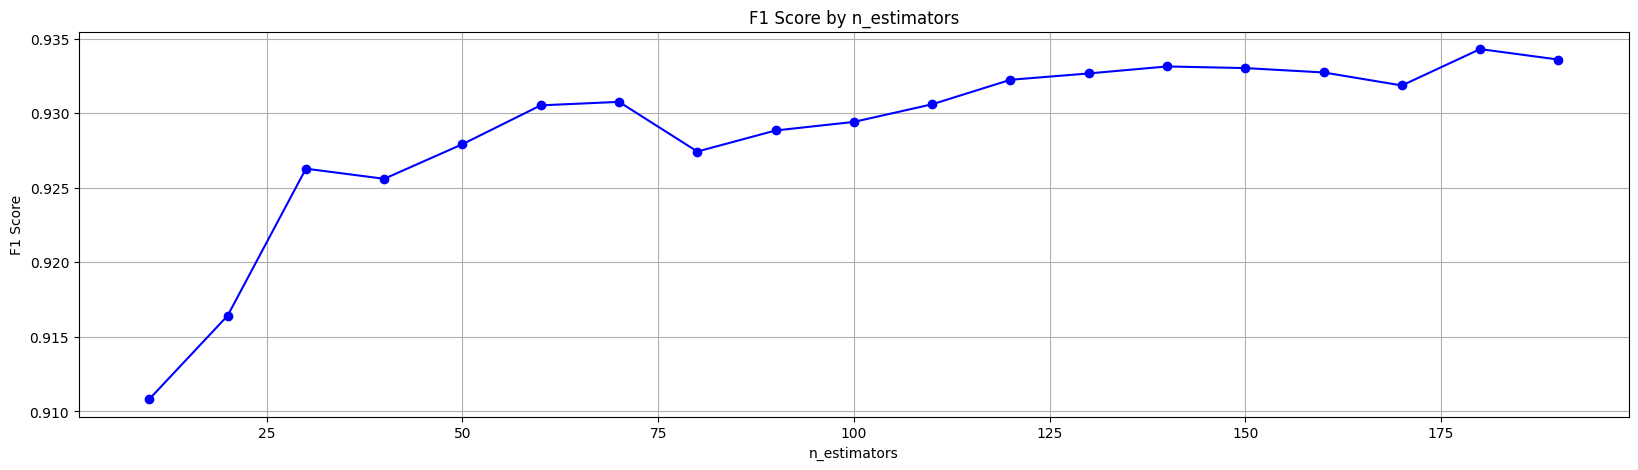

In [163]:
#Tuning RandomForestClassifier

# Find the best n_estimators

from sklearn.model_selection import cross_val_score

scoreL = []
n_estimators_range = range(10, 200, 10) 

for i in n_estimators_range:
    rfc = RandomForestClassifier(n_estimators=i,
                                 n_jobs=-1,
                                 min_samples_split=4,
                                 min_samples_leaf=2,
                                 verbose=0, 
                                 random_state=42)
    score = cross_val_score(rfc, X_train, y_train, cv=5, scoring='f1', verbose=0).mean()
    scoreL.append(score)


best_score = max(scoreL)
best_n_estimators = n_estimators_range[scoreL.index(best_score)]  # Adjusted to get the correct n_estimators

print(f"Best average cross-validation F1 score: {best_score}")
print(f"Best n_estimators: {best_n_estimators}")

# Plotting
plt.figure(figsize=[20,5])
plt.plot(n_estimators_range, scoreL, marker='o', linestyle='-', color='b')
plt.title("F1 Score by n_estimators")
plt.xlabel("n_estimators")
plt.ylabel("F1 Score")
plt.grid(True)
plt.show()


In [164]:
from sklearn.metrics import make_scorer

rfc = RandomForestClassifier(n_estimators=180,random_state=42)

# Define the grid of hyperparameters to search
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 4],
}

f1_scorer = make_scorer(f1_score)

grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, scoring=f1_scorer, verbose=0, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best parameters found:", grid_search.best_params_)
print("Best average F1 score from CV:", grid_search.best_score_)

best_model = grid_search.best_estimator_

from sklearn.metrics import classification_report
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))


Best parameters found: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best average F1 score from CV: 0.9377640042051107
              precision    recall  f1-score   support

           0       0.92      0.91      0.92       376
           1       0.58      0.61      0.59        72

    accuracy                           0.87       448
   macro avg       0.75      0.76      0.76       448
weighted avg       0.87      0.87      0.87       448



In [165]:
# Check the prediction class percentage:

y_pred = grid_search.predict(X_test)

n_1_sample_resampled = pd.Series(y_pred).value_counts()[1]
n_0_sample_resampled = pd.Series(y_pred).value_counts()[0]
n_sample_resampled = len(y_pred)

# Calculate the percentages
percentage_1_resampled = n_1_sample_resampled / n_sample_resampled
percentage_0_resampled = n_0_sample_resampled / n_sample_resampled

print("Percentage of Class 1:", percentage_1_resampled)
print("Percentage of Class 0:", percentage_0_resampled)

Percentage of Class 1: 0.16964285714285715
Percentage of Class 0: 0.8303571428571429


Best average cross-validation F1 score: 0.9206394122981356
Best n_estimators: 70


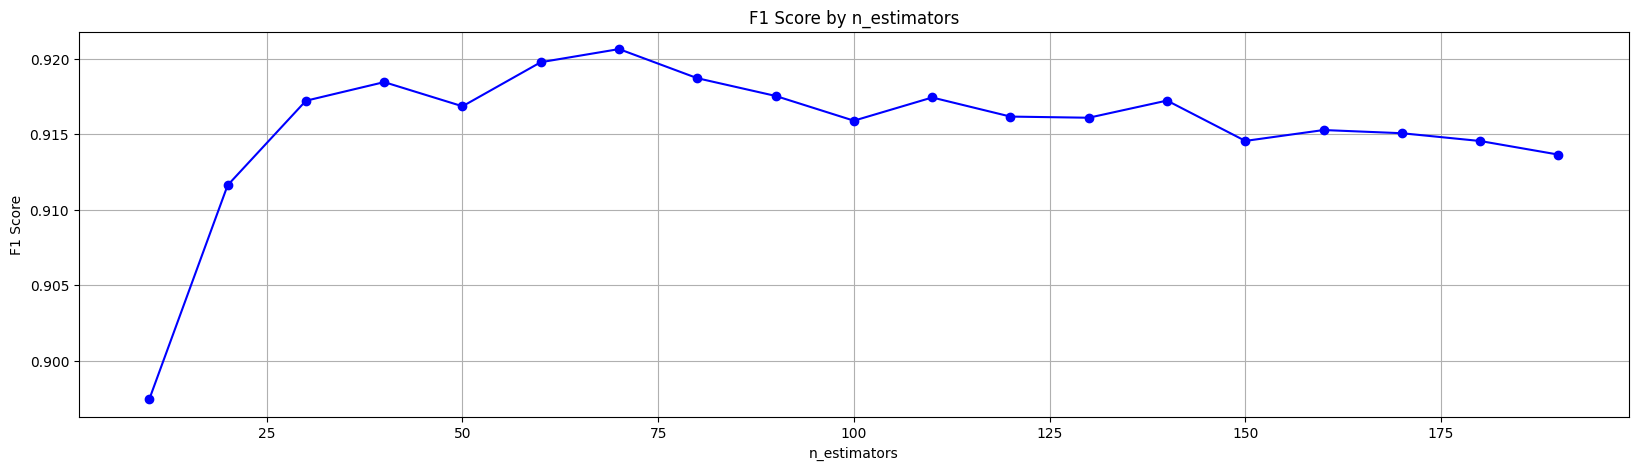

In [166]:
#Tuning XGBoost

# Find the best n_estimators

from sklearn.model_selection import cross_val_score

scoreL = []
n_estimators_range = range(10, 200, 10) 

for i in n_estimators_range:
    xgb_clf = xgb.XGBClassifier(n_estimators=i,
                                 n_jobs=-1,
                                 use_label_encoder=False, 
                                 eval_metric='logloss',
                                 random_state=42)
    score = cross_val_score(xgb_clf, X_train, y_train, cv=5, scoring='f1', verbose=0).mean()
    scoreL.append(score)


best_score = max(scoreL)
best_n_estimators = n_estimators_range[scoreL.index(best_score)]

print(f"Best average cross-validation F1 score: {best_score}")
print(f"Best n_estimators: {best_n_estimators}")

# Plotting
plt.figure(figsize=[20,5])
plt.plot(n_estimators_range, scoreL, marker='o', linestyle='-', color='b')
plt.title("F1 Score by n_estimators")
plt.xlabel("n_estimators")
plt.ylabel("F1 Score")
plt.grid(True)
plt.show()


In [108]:
xgb_clf = xgb.XGBClassifier(n_estimators = 70, use_label_encoder=False, eval_metric='logloss')

# Define the parameters grid
param_grid = {
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3],
    'gamma': [0, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}

# Grid search with cross-validation
grid_search = GridSearchCV(estimator=xgb_clf, param_grid=param_grid, cv=3, scoring='f1', verbose=1, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters found:", grid_search.best_params_)
print("Best average F1 score from CV:", grid_search.best_score_)


Fitting 3 folds for each of 96 candidates, totalling 288 fits
Best parameters found: {'colsample_bytree': 0.8, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 1, 'subsample': 0.8}
Best average F1 score from CV: 0.9208021344542993


In [109]:
# Check the prediction class percentage:

y_pred = grid_search.predict(X_test)

n_1_sample_resampled = pd.Series(y_pred).value_counts()[1]
n_0_sample_resampled = pd.Series(y_pred).value_counts()[0]
n_sample_resampled = len(y_pred)

# Calculate the percentages
percentage_1_resampled = n_1_sample_resampled / n_sample_resampled
percentage_0_resampled = n_0_sample_resampled / n_sample_resampled

print("Percentage of Class 1:", percentage_1_resampled)
print("Percentage of Class 0:", percentage_0_resampled)

Percentage of Class 1: 0.16517857142857142
Percentage of Class 0: 0.8348214285714286


In [110]:
# Put all tunned model together to compare with previous untunned models

methods = [
    LogisticRegression(C=0.01, penalty='l2', solver='liblinear'), 
    GaussianNB(),
    RandomForestClassifier(n_estimators=180, max_depth=None, min_samples_leaf=1, min_samples_split=2), 
    xgb.XGBClassifier(n_estimators=70, colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, min_child_weight=1, subsample=0.8, use_label_encoder=False, eval_metric='logloss') 
]

results_list = []
models = []

for method in methods:
    model = method
    models.append(model)
    model_name = model.__class__.__name__
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred) * 100
    precision = precision_score(y_test, y_pred) * 100
    recall = recall_score(y_test, y_pred) * 100
    f1 = f1_score(y_test, y_pred) * 100 

    results_list.append([model_name, accuracy, precision, recall, f1])

results = pd.DataFrame(results_list, columns=["Models", "Accuracy", "Precision", "Recall", "f1_score"])

results


,Models,Accuracy,Precision,Recall,f1_score
0,LogisticRegression,74.107143,35.333333,73.611111,47.747748
1,GaussianNB,68.750000,28.205128,61.111111,38.596491
2,RandomForestClassifier,86.607143,57.894737,61.111111,59.459459
3,XGBClassifier,86.607143,58.108108,59.722222,58.904110


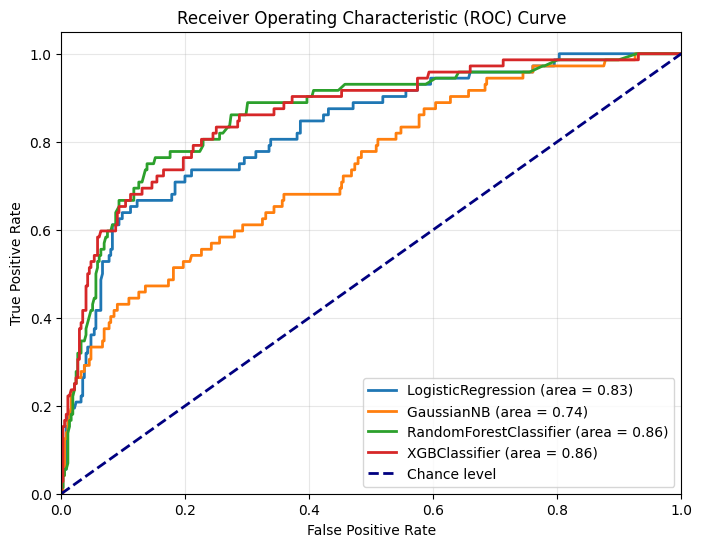

In [111]:
# Draw ROC Curve

from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(8, 6))


for model in models:
    y_score = model.predict_proba(X_test)[:, 1]

    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)

    model_name = model.__class__.__name__
    plt.plot(fpr, tpr, lw=2, label=f'{model_name} (area = {roc_auc:.2f})')

# Plot chance line
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Chance level')


plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()


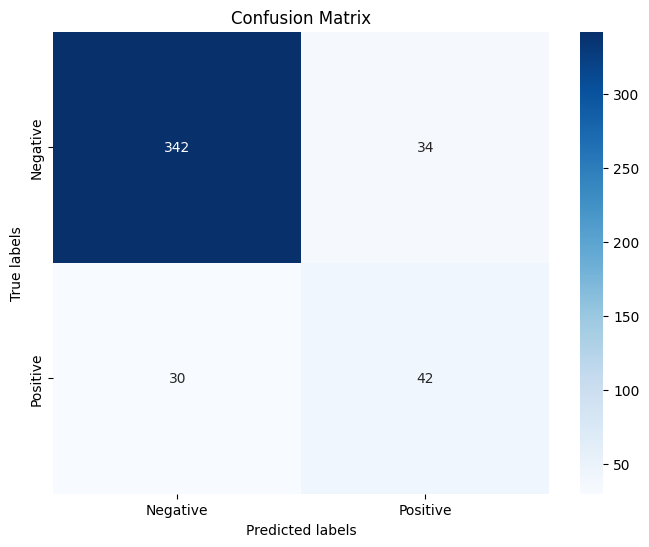

In [183]:
# Draw confusion matrix

from sklearn.metrics import confusion_matrix

rfm = RandomForestClassifier(n_estimators=180, max_depth=None, min_samples_leaf=1, min_samples_split=2).fit(X_train, y_train) 

y_pred = rfm.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax) 

# Labels, title, and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Negative', 'Positive'])
ax.yaxis.set_ticklabels(['Negative', 'Positive'])

plt.show()

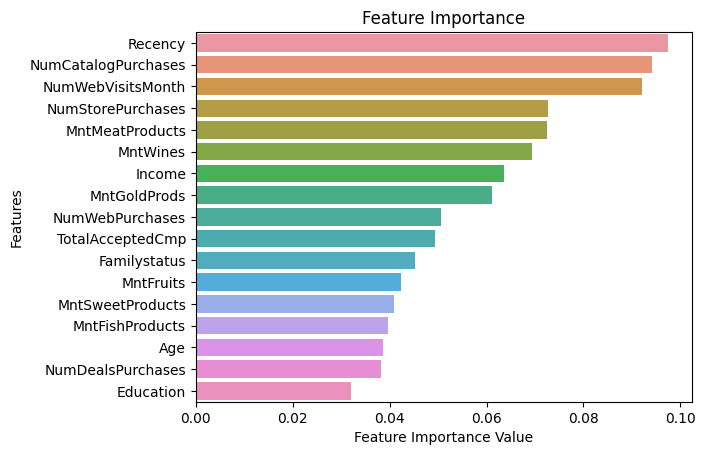

In [112]:
# Check feature importance

feature_importance = pd.Series(rfm.feature_importances_,index=X_train.columns).sort_values(ascending=False)
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.xlabel('Feature Importance Value')
plt.ylabel('Features')
plt.title("Feature Importance")
plt.show()

## Identify High Responsive Customers

In [114]:
columns_to_scale = [col for col in df.columns if col not in ['TotalAcceptedCmp']]

# Initialize the scaler
scaler = StandardScaler()

df_scaled = scaler.fit_transform(df[columns_to_scale])
scaled_continuous_features_df = pd.DataFrame(df_scaled, index=df.index, columns=columns_to_scale)

total_accepted_cmp = df[['TotalAcceptedCmp']]

# Add the unscaled binary feature back to the scaled DataFrame
df_combined = pd.concat([scaled_continuous_features_df, total_accepted_cmp], axis=1)

In [115]:
from sklearn.cluster import KMeans

k = 5

# Initialize K-Means with the desired number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)

# Fit the model to your data and predict the clusters
clusters = kmeans.fit_predict(df)

# Add the cluster assignments back to the original DataFrame
df['Cluster'] = clusters

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


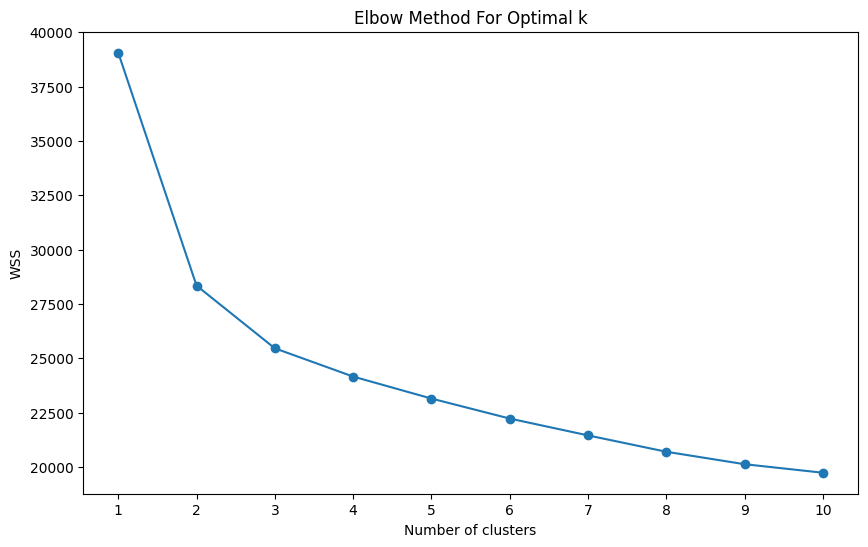

In [117]:
# Calculate the Within-Cluster-Sum of Squared Errors (WSS) for different values of k
wss = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, n_init=10, random_state=42)
    km.fit(df_combined)
    wss.append(km.inertia_)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wss, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WSS')
plt.xticks(range(1, 11))
plt.show()

Based on the above elbow point, K = 3 can be a optimal K value

In [176]:
k = 3

# Initialize K-Means with the desired number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)

# Fit the model to your data and predict the clusters
clusters = kmeans.fit_predict(df)

# Add the cluster assignments back to the original DataFrame
df['Cluster'] = clusters


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [177]:
# Profile each cluster by calculating the mean of each feature within each cluster
cluster_profiles = df.groupby('Cluster').mean()

# You can include other statistical summaries like count, median, etc., as needed
cluster_counts = df['Cluster'].value_counts()

In [178]:
cluster_profiles

,Education,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Age,TotalAcceptedCmp,Familystatus
Cluster,,,,,,,,,,,,,,,,,,
0,1.604631,35030.819861,49.253002,83.546312,7.469125,39.484563,11.650943,8.088336,23.798456,2.413379,2.791595,0.885935,3.698113,6.619211,0.111492,48.098628,0.116638,2.188679
1,1.730841,70411.804673,48.967290,544.499065,46.770093,305.921495,65.743925,47.776636,65.978505,2.230841,5.500000,4.600000,8.081308,3.901869,0.190654,52.285047,0.495327,1.691589
2,1.000000,666666.000000,23.000000,9.000000,14.000000,18.000000,8.000000,1.000000,12.000000,4.000000,3.000000,1.000000,3.000000,6.000000,0.000000,42.000000,0.000000,2.000000


In [179]:
cluster_counts

Cluster
0    1166
1    1070
2       1
Name: count, dtype: int64